In [1]:
import pandas as pd
import math
from plotnine import *
import numpy as np
import statsmodels.api as sm
import statsmodels.tools as smt
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
# Need to specify the headers for this dataset
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
       "num_doors", "body_style", "drive_wheels", "engine_location",
       "wheel_base", "length", "width", "height", "curb_weight", "engine_type",
       "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
       "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg",
       "price"]


cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos//imports-85.data", names=cols)
#cars.dtypes

In [3]:
import numpy as np

cars = cars.replace('?', np.nan)

# Now lets make things numeric
num_vars = ['normalized_losses', "bore", "stroke", "horsepower", "peak_rpm", "price"]

for i in num_vars:
    cars[i] = cars[i].astype('float64')
    
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# Élimine les véhicules pour lequel le prix n'est pas disponible
cars = cars.dropna(subset = ['price'])

In [5]:
modele_simple = smf.ols('price ~ city_mpg', cars).fit()
modele_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.32e-29
Time:                        12:33:21   Log-Likelihood:                -2025.7
No. Observations:                 201   AIC:                             4055.
Df Residuals:                     199   BIC:                             4062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.46e+04   1656.777     20.881      0.000    3.13e+04    3.79e+04
city_mpg    -849.4532     63.767    -13.321      0.000    -975.200    -723.706
==============================================================================
Omnibus:                       62.609   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.165
Skew:                           1.548   Prob(JB):                     4.89e-27
Kurtosis:                       5.211   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

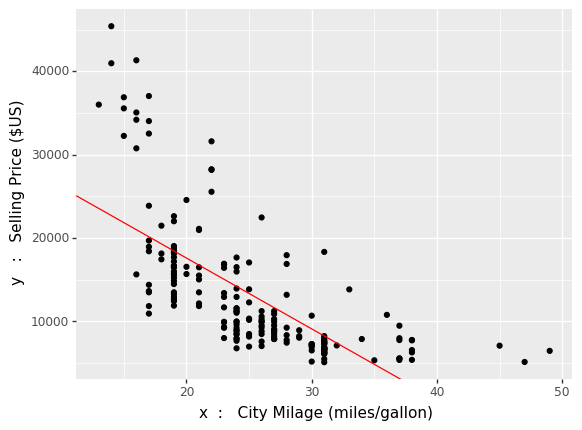

<ggplot: (-9223371899167856224)>

In [6]:
# Affichage des résultats sans distinction de type de véhicule
ggplot(cars, aes(x='city_mpg', y='price')) + geom_point() \
+ geom_abline( aes(intercept=modele_simple.params['Intercept'], slope=modele_simple.params['city_mpg']), color='red') \
+ labs(x='x  :   City Milage (miles/gallon)', y='y   :   Selling Price ($US)') 

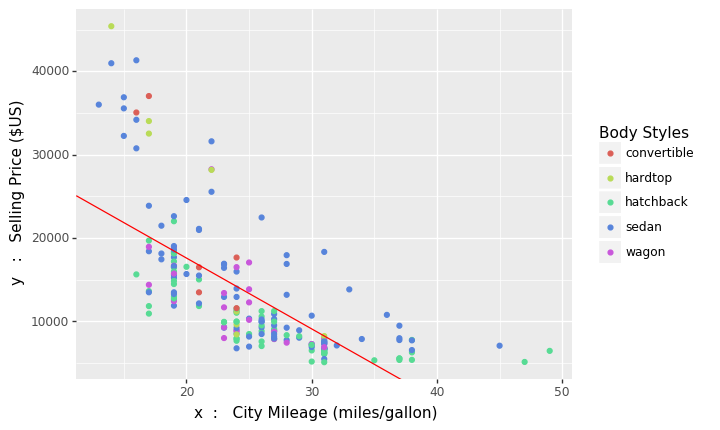

<ggplot: (-9223371899167118588)>

In [7]:
# Affichage des résultats avec distinction de type de véhicule
ggplot(cars, aes(x='city_mpg', y='price', color='body_style')) + geom_point() \
+ geom_abline( aes(intercept=modele_simple.params['Intercept'], slope=modele_simple.params['city_mpg']), color='red') \
+ labs(x='x  :   City Mileage (miles/gallon)', y='y   :   Selling Price ($US)', color='Body Styles') 


In [8]:
# Sauvegarde de l'image. Cette commande ne fonctionne pas
# ggsave("Car_mileage_versus_price.pdf", width = 20, height = 20, units = "cm")